accuracy
20133/36000 (0.559250)
RMSE(Root mean squared error)
0.9012645437260792
Per class accuracy
[0.98297872 0.84831322 0.64337223 0.51734945 0.46088665 0.39428118]
Per class RMSE
[0.23520023 0.5383587  0.78358336 0.83841077 0.93409237 1.256911  ]
[[ 924   12    2    0    2    0]
 [  28 3445  472   86   21    9]
 [   1  770 4907 1454  400   95]
 [   0  232 1814 4622 1842  424]
 [   0   87  673 2355 3753 1275]
 [   0   42  291 1058 2422 2482]]
Confusion matrix, without normalization
[[ 924   12    2    0    2    0]
 [  28 3445  472   86   21    9]
 [   1  770 4907 1454  400   95]
 [   0  232 1814 4622 1842  424]
 [   0   87  673 2355 3753 1275]
 [   0   42  291 1058 2422 2482]]


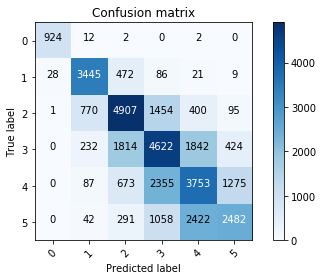

In [2]:
import json
import numpy as np
import os
import skimage.io
from matplotlib import pyplot as plt
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

with open('/home/ubuntu/efs/amazon-bin/code/workspace/sravan-dl/input/counting_val_new.json') as f:        
    val_list = json.loads(f.read())

n = 0
perclass_correct = np.zeros(6) 
perclass_dist = np.zeros(6) 
perclass_N = np.zeros(6)
confusion_matrix = np.zeros((6,6), dtype=int)

with open('/home/ubuntu/efs/amazon-bin/code/workspace/sravan-dl/output/counting_result_resnet3.txt') as f:
    k = 0
    for line in f:
        pred = int(line)
        gt = int(val_list[n][1])
#         if gt == 2 and pred != gt and k<50:
#             img_name = '%05d.jpg' % (val_list[n][0] + 1)
#             img = os.path.join('/home/ubuntu/efs/amazon-bin/data/bin-images-resize/'
#                                , img_name)
#             img_data = skimage.io.imread(img)
#             print("actual is", gt)
#             print("pred is", pred)
#             print('image is', img)
#             plt.imshow(img_data)
#             plt.pause(0.001) 
#             k = k + 1
            
        perclass_correct[gt] = perclass_correct[gt] + int(pred==gt) 
        perclass_dist[gt] = perclass_dist[gt] + np.power(pred-gt,2)
        perclass_N[gt] = perclass_N[gt] + 1
        
        confusion_matrix[gt][pred] += 1
        
        n = n+1
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print('accuracy')
print('%d/%d (%f)' %(perclass_correct.sum(), perclass_N.sum(), perclass_correct.sum()/perclass_N.sum()))
print('RMSE(Root mean squared error)')
print(np.sqrt(perclass_dist.sum()/perclass_N.sum()))
print('Per class accuracy')
print(perclass_correct/perclass_N)
print('Per class RMSE')
print(np.sqrt(perclass_dist/perclass_N))
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix, [0, 1, 2, 3, 4, 5])
# weighted loss,   - F1, RMSE, Area under ROC.. confusion, heatmaps, 

    
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                     title='Normalized confusion matrix')